# Sales Manager conversions

We need to calculate conversion rate from touch to deal and understand who is the best salesman.

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is the first part of the conversion calculation, which in my opinion is not entirely correct.

In [2]:
df = pd.read_csv('../data/best_salesman_homework.csv')
display(df.head())
print(df.shape)

,client_account_id,date,event_name,manager_id,manager_nickname
0,0,2022-05-09,first_touch,1.0,Justin Beiber
1,1,2022-03-21,first_touch,3.0,Joe Biden
2,2,2022-04-18,first_touch,2.0,Kylie Jenner
3,3,2022-02-07,first_touch,2.0,Kylie Jenner
4,4,2022-04-08,first_touch,1.0,Justin Beiber


(3183, 5)


In [336]:
# Let's see if there are any gaps in our date frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   client_account_id            3183 non-null   int64  
 1   date                         3183 non-null   object 
 2   event_name                   3183 non-null   object 
 3   manager_id                   3183 non-null   float64
 4   manager_nickname             3183 non-null   object 
 5   duplicate_client_account_id  3183 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 149.3+ KB


In [4]:
# Pivot table by events and managers
pd.crosstab(df['event_name'], df['manager_nickname'])

manager_nickname,Joe Biden,Justin Beiber,Kylie Jenner
event_name,,,
deal,91,37,68
first_touch,1158,890,939


In [19]:
# Counting the number of deal events for manager Joe Biden
count_deal_joe_biden = df['event_name'][(df['manager_nickname']=='Joe Biden') & (df['event_name']=='deal')].count()
count_deal_joe_biden

91

In [20]:
# Counting the number of first touch events for manager Joe Biden
count_first_touch_joe_biden = df['event_name'][(df['manager_nickname']=='Joe Biden') & (df['event_name']=='first_touch')].count()
count_first_touch_joe_biden

1158

In [339]:
# Conversion manager Joe Biden 
convertion_joe_biden = (count_deal_joe_biden / count_first_touch_joe_biden)*100
convertion_joe_biden

7.858376511226252

In [18]:
# Counting the number of deal events for manager Justin Beiber
count_deal_justin_beiber = df['event_name'][(df['manager_nickname']=='Justin Beiber') & (df['event_name']=='deal')].count()
count_deal_justin_beiber

37

In [21]:
# Counting the number of first touch events for manager Justin Beiber
count_first_touch_justin_beiber = df['event_name'][(df['manager_nickname']=='Justin Beiber') & (df['event_name']=='first_touch')].count()
count_first_touch_justin_beiber

890

In [338]:
# Conversion manager Justin Beiber
convertion_justin_beiber = (count_deal_justin_beiber / count_first_touch_justin_beiber)*100
convertion_justin_beiber

4.157303370786517

In [23]:
# Counting the number of deal events for manager Kylie Jenner
count_deal_kylie_jenner = df['event_name'][(df['manager_nickname']=='Kylie Jenner') & (df['event_name']=='deal')].count()
count_deal_kylie_jenner

68

In [24]:
# Counting the number of first touch events for manager Kylie Jenner
count_first_touch_kylie_jenner = df['event_name'][(df['manager_nickname']=='Kylie Jenner') & (df['event_name']=='first_touch')].count()
count_first_touch_kylie_jenner

939

In [337]:
# Conversion manager Kylie Jenner
convertion_kylie_jenner = (count_deal_kylie_jenner / count_first_touch_kylie_jenner)*100
convertion_kylie_jenner

7.24174653887114

Conclusion: Joe Biden has the highest conversion, it is equal to 7.86%. But further I calculated the conversion more correctly, in my opinion.

# This is the second part of the calculations, where I try to correctly calculate the conversion

In [286]:
# I put the units in a separate column to mark the id of clients that appear in the table more than once.
df['duplicate_client_account_id'] = pd.factorize(df['client_account_id'].duplicated())[0]

In [287]:
# Created a list with id's that appear more than once
purchase_id_list = list(df['client_account_id'][df['duplicate_client_account_id']==1])

In [340]:
# Let's see all the events and managers of these clients
purchase_id_df = df[df["client_account_id"].isin(purchase_id_list)]
purchase_id_df

,client_account_id,date,event_name,manager_id,manager_nickname,duplicate_client_account_id
40,40,2022-05-02,first_touch,1.0,Justin Beiber,0
41,40,2022-02-24,deal,3.0,Joe Biden,1
64,63,2022-02-03,first_touch,1.0,Justin Beiber,0
65,63,2022-03-14,deal,2.0,Kylie Jenner,1
88,86,2021-12-17,first_touch,3.0,Joe Biden,0
...,...,...,...,...,...,...
3050,2856,2021-12-01,deal,2.0,Kylie Jenner,1
3079,2885,2021-10-21,first_touch,2.0,Kylie Jenner,0
3080,2885,2022-04-20,deal,3.0,Joe Biden,1
3091,2896,2022-01-07,first_touch,3.0,Joe Biden,0


In [292]:
# Sort by client account id and date
# We see that there are cases when first_touch and deal belong to different managers,
# And we have a task to calculate the conversion from first touch to deal for each manager
purchase_id_df.sort_values(['client_account_id', 'date'])

,client_account_id,date,event_name,manager_id,manager_nickname,duplicate_client_account_id
41,40,2022-02-24,deal,3.0,Joe Biden,1
40,40,2022-05-02,first_touch,1.0,Justin Beiber,0
64,63,2022-02-03,first_touch,1.0,Justin Beiber,0
65,63,2022-03-14,deal,2.0,Kylie Jenner,1
88,86,2021-12-17,first_touch,3.0,Joe Biden,0
...,...,...,...,...,...,...
3049,2856,2022-05-30,first_touch,3.0,Joe Biden,0
3079,2885,2021-10-21,first_touch,2.0,Kylie Jenner,0
3080,2885,2022-04-20,deal,3.0,Joe Biden,1
3091,2896,2022-01-07,first_touch,3.0,Joe Biden,0


In [294]:
# Using grouping, we can see where both events belong to the same manager (in the third column, the numbers '2')
match_clinte_manager = purchase_id_df.groupby(['client_account_id','manager_nickname'])['client_account_id'].count()
match_clinte_manager.head(18)

client_account_id  manager_nickname
40                 Joe Biden           1
                   Justin Beiber       1
63                 Justin Beiber       1
                   Kylie Jenner        1
86                 Joe Biden           1
                   Justin Beiber       1
87                 Justin Beiber       1
                   Kylie Jenner        1
127                Joe Biden           1
                   Justin Beiber       1
134                Joe Biden           1
                   Justin Beiber       1
135                Joe Biden           1
                   Kylie Jenner        1
136                Justin Beiber       2
138                Joe Biden           1
                   Justin Beiber       1
145                Joe Biden           1
Name: client_account_id, dtype: int64

In [410]:
# We are only interested in cases where both first_touch and deal belong to the same manager
touch_to_deal_managers = match_clinte_manager[match_clinte_manager > 1]
touch_to_deal_managers

client_account_id  manager_nickname
136                Justin Beiber       2
176                Joe Biden           2
220                Kylie Jenner        2
259                Joe Biden           2
315                Justin Beiber       2
                                      ..
2738               Joe Biden           2
2751               Joe Biden           2
2781               Kylie Jenner        2
2789               Justin Beiber       2
2849               Joe Biden           2
Name: client_account_id, Length: 65, dtype: int64

In [411]:
# Revert From MultiIndex to Single Index 
touch_to_deal_managers = touch_to_deal_managers.reset_index(['manager_nickname'])

In [415]:
# Let's create a list with client_account_id values to display all the data of exactly those clients
# with whom in first_touch and in deal one manager worked 
touch_to_deal_managers_clints_list = list(touch_to_deal_managers.index.values)

In [416]:
# Let's look at our data. We see that there are cases when a deal happened earlier than first_touch with the same client
# And according to our task, we need to find exactly the conversion from first_touch to deal
df_managers_clints = purchase_id_df[purchase_id_df['client_account_id'].isin(touch_to_deal_managers_clints_list)]
df_managers_clints

,client_account_id,date,event_name,manager_id,manager_nickname,duplicate_client_account_id
143,136,2022-03-09,first_touch,1.0,Justin Beiber,0
144,136,2022-04-29,deal,1.0,Justin Beiber,1
186,176,2021-08-31,first_touch,3.0,Joe Biden,0
187,176,2021-09-04,deal,3.0,Joe Biden,1
233,220,2022-03-04,first_touch,2.0,Kylie Jenner,0
...,...,...,...,...,...,...
2970,2781,2021-12-25,deal,2.0,Kylie Jenner,1
2979,2789,2022-03-31,first_touch,1.0,Justin Beiber,0
2980,2789,2022-05-30,deal,1.0,Justin Beiber,1
3041,2849,2022-04-02,first_touch,3.0,Joe Biden,0


In [417]:
# Sort by date
sorted_by_date = df_managers_clints.sort_values(['date'])
sorted_by_date

,client_account_id,date,event_name,manager_id,manager_nickname,duplicate_client_account_id
1725,1617,2021-05-23,first_touch,3.0,Joe Biden,0
2537,2386,2021-06-07,first_touch,3.0,Joe Biden,0
1084,1021,2021-06-09,first_touch,3.0,Joe Biden,0
2634,2474,2021-06-12,first_touch,3.0,Joe Biden,0
1955,1841,2021-06-28,first_touch,3.0,Joe Biden,0
...,...,...,...,...,...,...
842,797,2022-05-25,first_touch,2.0,Kylie Jenner,0
493,467,2022-05-27,deal,1.0,Justin Beiber,1
1098,1032,2022-05-30,deal,1.0,Justin Beiber,1
2980,2789,2022-05-30,deal,1.0,Justin Beiber,1


In [418]:
# Create pivot table
correct_date_order = sorted_by_date.pivot(index=["client_account_id"], columns=["event_name"], values='date')
correct_date_order

event_name,deal,first_touch
client_account_id,,
136,2022-04-29,2022-03-09
176,2021-09-04,2021-08-31
220,2022-04-14,2022-03-04
259,2022-03-09,2022-05-15
315,2022-04-11,2022-03-18
...,...,...
2738,2022-04-18,2021-08-07
2751,2022-04-04,2021-12-29
2781,2021-12-25,2022-01-17


In [419]:
# Let's select the client_account_id with managers whose first first_touch, 
# and then deal (this is exactly the conversion we are looking for)
correct_date_order[correct_date_order['deal'] > correct_date_order['first_touch']]

event_name,deal,first_touch
client_account_id,,
136,2022-04-29,2022-03-09
176,2021-09-04,2021-08-31
220,2022-04-14,2022-03-04
315,2022-04-11,2022-03-18
330,2021-10-29,2021-07-11
343,2022-04-04,2022-02-17
467,2022-05-27,2022-03-28
500,2022-03-09,2021-08-01
578,2022-02-26,2021-11-03


In [420]:
# Wrap the indexes (client_account_id) in a list for further work
correct_date_order_list = list(correct_date_order[correct_date_order['deal'] > correct_date_order['first_touch']].index.values)

In [421]:
# Table for correct calculation of the number of deals for each manager
managers_correct_date_order = df[df['client_account_id'].isin(correct_date_order_list)]
managers_correct_date_order

,client_account_id,date,event_name,manager_id,manager_nickname,duplicate_client_account_id
143,136,2022-03-09,first_touch,1.0,Justin Beiber,0
144,136,2022-04-29,deal,1.0,Justin Beiber,1
186,176,2021-08-31,first_touch,3.0,Joe Biden,0
187,176,2021-09-04,deal,3.0,Joe Biden,1
233,220,2022-03-04,first_touch,2.0,Kylie Jenner,0
...,...,...,...,...,...,...
2924,2738,2022-04-18,deal,3.0,Joe Biden,1
2937,2751,2021-12-29,first_touch,3.0,Joe Biden,0
2938,2751,2022-04-04,deal,3.0,Joe Biden,1
2979,2789,2022-03-31,first_touch,1.0,Justin Beiber,0


In [422]:
# Correct calculation of the number of deal events for manager Joe Biden
correct_count_deal_joe_biden = managers_correct_date_order['event_name'][(managers_correct_date_order['manager_nickname']=='Joe Biden') & (managers_correct_date_order['event_name']=='deal')].count()
correct_count_deal_joe_biden

23

In [423]:
# Counting the number of first touch events for manager Joe Biden
count_first_touch_joe_biden = df['event_name'][(df['manager_nickname']=='Joe Biden') & (df['event_name']=='first_touch')].count()
count_first_touch_joe_biden

1158

In [431]:
# Correct conversion for manager Joe Biden
correct_conversion_joe_biden = ((correct_count_deal_joe_biden / count_first_touch_joe_biden)*100).round(2)
correct_conversion_joe_biden

1.99

In [425]:
# Correct calculation of the number of deal events for manager Kylie Jenner
correct_count_deal_kylie_jenner = managers_correct_date_order['event_name'][(managers_correct_date_order['manager_nickname']=='Kylie Jenner') & (managers_correct_date_order['event_name']=='deal')].count()
correct_count_deal_kylie_jenner

12

In [426]:
# Counting the number of first touch events for manager Kylie Jenner
count_first_touch_kylie_jenner = df['event_name'][(df['manager_nickname']=='Kylie Jenner') & (df['event_name']=='first_touch')].count()
count_first_touch_kylie_jenner

939

In [432]:
# Correct conversion for manager Kylie Jenner
correct_conversion_kylie_jenner = ((correct_count_deal_kylie_jenner / count_first_touch_kylie_jenner)*100).round(2)
correct_conversion_kylie_jenner

1.28

In [428]:
# Correct calculation of the number of deal events for manager Justin Beiber
correct_count_deal_justin_beiber = managers_correct_date_order['event_name'][(managers_correct_date_order['manager_nickname']=='Justin Beiber') & (managers_correct_date_order['event_name']=='deal')].count()
correct_count_deal_justin_beiber

8

In [429]:
# Counting the number of first touch events for manager Justin Beiber
count_first_touch_justin_beiber = df['event_name'][(df['manager_nickname']=='Justin Beiber') & (df['event_name']=='first_touch')].count()
count_first_touch_justin_beiber

890

In [434]:
# Correct conversion for manager Justin Beiber
correct_conversion_justin_beiber = ((correct_count_deal_justin_beiber / count_first_touch_justin_beiber)*100).round(2)
correct_conversion_justin_beiber

0.9

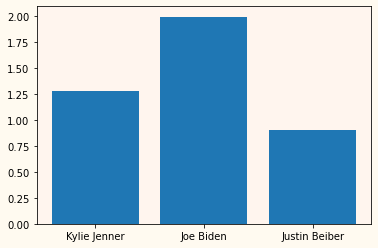

In [445]:
x = ['Kylie Jenner', 'Joe Biden', 'Justin Beiber']
y = [correct_conversion_kylie_jenner, correct_conversion_joe_biden, correct_conversion_justin_beiber]

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(6)    
fig.set_figheight(4)    

plt.show()

Conclusion: Joe Biden has the highest conversion, it is equal to 1.99%